<a href="https://colab.research.google.com/github/K0SATIN/ML_practical_work_1/blob/main/FakeNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

data = pd.read_csv('https://storage.yandexcloud.net/academy.ai/practica/fake_news.csv')
print(data.head())

   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  


In [ ]:
data.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object
label
REAL    3171
FAKE    3164
Name: count, dtype: int64


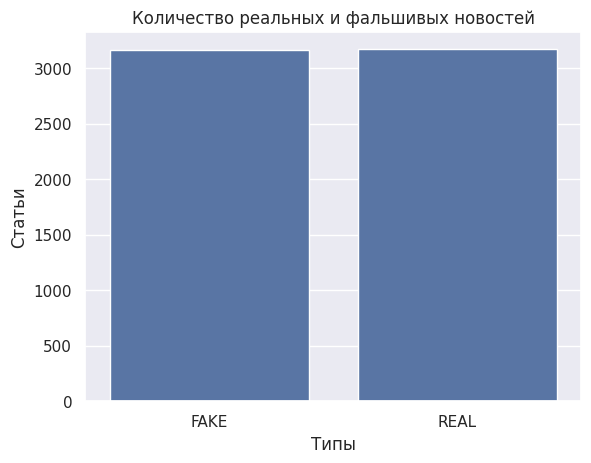

In [ ]:
labels = data.label
print(labels.head())

target = data.label.value_counts()
print(target)

sns.countplot(x = data.label)
plt.title("Количество реальных и фальшивых новостей")
plt.xlabel('Типы')
plt.ylabel('Статьи')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
# spliting the dataset
xtrain, xtest, ytrain, ytest = train_test_split(data['text'], labels, test_size=0.2, random_state=7)

In [ ]:
#применяем Term Frequency-Inverse Document Frequency и чистим от стоп-слов
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
train = tfidf.fit_transform(xtrain)
test = tfidf.transform(xtest)

In [ ]:
#применяем PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(train, ytrain)
ypred = pac.predict(test)
accuracy = accuracy_score(ytest, ypred)
print(f'Accuracy Score of Passive Aggresive Scassifier: {round(accuracy*100,2)}%')

Accuracy Score of Passive Aggresive Scassifier: 92.82%


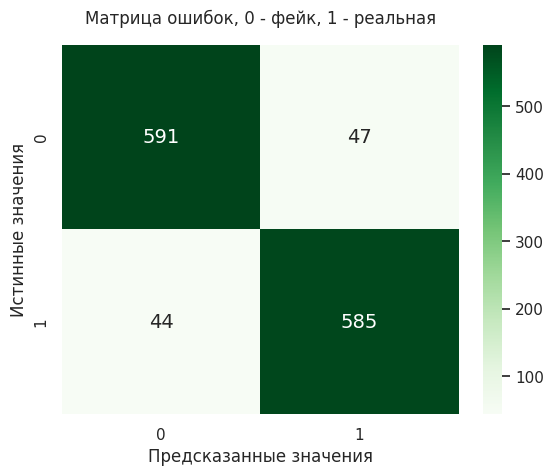

In [ ]:
# отображаем матрицу ошибок
cm = confusion_matrix(ytest, ypred, labels=["FAKE", "REAL"])
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', annot_kws={'fontsize': 14})
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.title('Матрица ошибок, 0 - фейк, 1 - реальная', pad=15)
plt.show()